In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def plot_maternal_paternal_count(df):
    fig, ax = plt.subplots(1, 1)
    ax.scatter(df["paternal_age"], df["paternal_count"], c="red", label="paternal")
    ax.scatter(df["maternal_age"], df["maternal_count"], c="blue", label="maternal")
    ax.legend()


## Aye aye

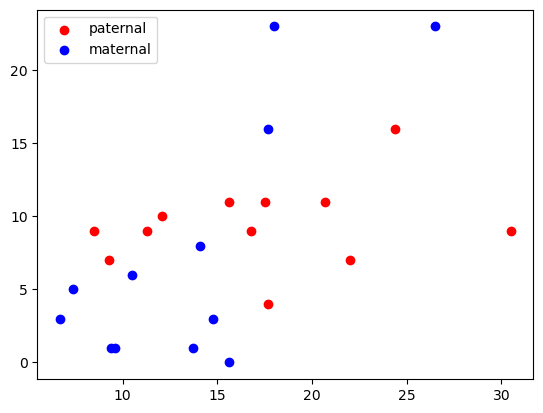

In [4]:
def load_ayeaye_hahn_data():
    denovo_filename = "./data/denovo_tables/ayeaye_hahn_denovo_table.csv"
    df = pd.read_csv(denovo_filename, sep=",")
    # group by Offsprint_ID, then get the count of M 
    offspring_ids = df["Offspring_ID"].unique()

    count_data = []
    id_list = []
    for oi in offspring_ids:
        id_list.append(oi)
        df_s = df[df["Offspring_ID"] == oi]
        unique_count = df_s["POOHA"].value_counts(dropna=False)
        maternal_count = 0 if "M" not in unique_count else unique_count["M"]
        row = {"sample_id": oi, "maternal_count": maternal_count, "paternal_count": unique_count["P"], "unphased_count": unique_count[np.nan], "total": len(df_s)}
        assert np.sum(unique_count) == len(df_s)
        count_data.append(row)
    df_count = pd.DataFrame(count_data)#, index=id_list)

    age_filename = "./data/mutation_rate_individual_species/Ayeaye_Wang_2024.xlsx"
    df_age = pd.read_excel(age_filename, converters={"maternal_age": float, "paternal_age": float, "mutation_count": int})[["sample_id", "paternal_age", "maternal_age"]]
    assert set(df_count["sample_id"]) == set(df_age["sample_id"])
    df_merge = pd.merge(df_age, df_count, on="sample_id")
    df_merge.to_csv("./output/phased_counts/ayeaye_wang_phased_counts.csv", index=False)
    plot_maternal_paternal_count(df_merge)
load_ayeaye_hahn_data()

## Baboon

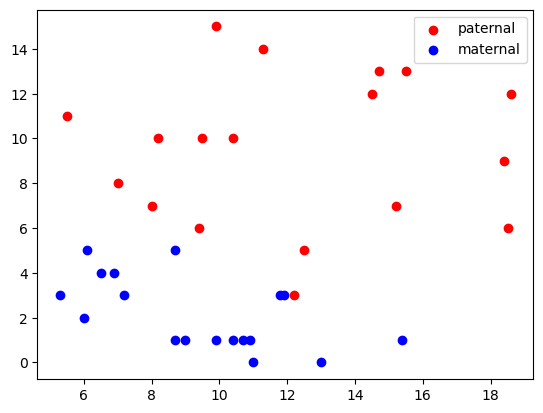

In [5]:
def load_baboon_hahn_data():
    denovo_filename = "./data/denovo_tables/baboon_hahn_denovo_table.csv"
    df = pd.read_csv(denovo_filename, sep=",")
    # group by Offsprint_ID, then get the count of M 
    offspring_ids = df["Offspring_ID"].unique()

    count_data = []
    id_list = []
    for oi in offspring_ids:
        id_list.append(oi)
        df_s = df[df["Offspring_ID"] == oi]
        unique_count = df_s["POOHA"].value_counts(dropna=False)
        maternal_count = 0 if "M" not in unique_count else unique_count["M"]
        row = {"sample_id": oi, "maternal_count": maternal_count, "paternal_count": unique_count["P"], "unphased_count": unique_count[np.nan], "total": len(df_s)}
        assert np.sum(unique_count) == len(df_s)
        count_data.append(row)
        # paternal_count, maternal_count, total, unphased_count, paternal_age, maternal_age
    df_count = pd.DataFrame(count_data)#, index=id_list)

    age_filename = "./data/mutation_rate_individual_species/Baboon_Wang_2024.xlsx"
    df_age = pd.read_excel(age_filename, converters={"maternal_age": float, "paternal_age": float, "mutation_count": int})[["sample_id", "paternal_age", "maternal_age"]]
    df_merge = pd.merge(df_age, df_count, on="sample_id")
    df_merge.to_csv("./output/phased_counts/baboon_wang_phased_counts.csv", index=False)
    plot_maternal_paternal_count(df_merge)

load_baboon_hahn_data()

## Cat

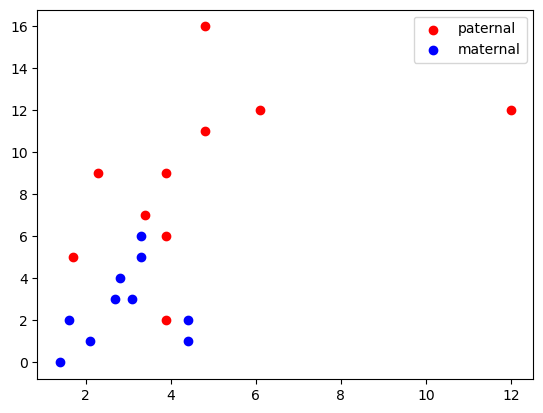

In [6]:
def load_cat_data():
    denovo_filename = "./data/denovo_tables/cat_wang_denovo_table.txt"
    df = pd.read_csv(denovo_filename, sep="\t")
    offspring_ids = df["PROBAND"].unique()

    count_data = []
    id_list = []
    for oi in offspring_ids:
        if oi == 679: # lack of parental age
            continue
        id_list.append(oi)
        df_s = df[df["PROBAND"] == oi]
        unique_count = df_s["COMBINED_PHASE"].value_counts(dropna=False)
        maternal_count = 0 if "F" not in unique_count else unique_count["F"]
        row = {"sample_id": oi, "maternal_count": maternal_count, "paternal_count": unique_count["M"], "unphased_count": unique_count[np.nan], "total": len(df_s)}
        assert np.sum(unique_count) == len(df_s)
        count_data.append(row)
    df_count = pd.DataFrame(count_data)#, index=id_list)
    
    age_filename = "./data/mutation_rate_individual_species/Cat_wang_2020.xlsx"
    col_header = ["sample_id", "paternal_age", "maternal_age", "mutation_count"]
    # skip the first row because no maternal and paternal age information
    df_age = pd.read_excel(age_filename, skiprows=1, header=None, names=col_header, usecols=[0,1,2,3])
    assert set(df_count["sample_id"]) == set(df_age["sample_id"])

    df_merge = pd.merge(df_age, df_count, on="sample_id")
    assert np.all(df_merge["total"] == df_merge["mutation_count"])
    df_merge.to_csv("./output/phased_counts/cat_phased_counts.csv", index=False)
    
    plot_maternal_paternal_count(df_merge)

load_cat_data()

## Human

In [22]:
def load_human_data():
    denovo_filename = "./data/denovo_tables/human_denovo_table.tsv"
    df = pd.read_csv(denovo_filename, sep="\t")
    name_map = {"Fathers_age_at_conception": "paternal_age", "Mothers_age_at_conception": "maternal_age"}
    df.rename(columns=name_map, inplace=True)
    offspring_ids = df["Proband_nr"].unique()

    count_data = []
    id_list = []
    all_phased_indiv_count = 0
    for idx, oi in enumerate(offspring_ids):
        id_list.append(oi)
        df_s = df[df["Proband_nr"] == oi]
        assert len(set(df_s["paternal_age"])) == 1
        assert len(set(df_s["maternal_age"])) == 1
        age_p, age_m = list(df_s["paternal_age"])[0], list(df_s["maternal_age"])[0]

        unique_count = df_s["Phase_combined"].value_counts(dropna=False)
        maternal_count = 0 if "mother" not in unique_count else unique_count["mother"]
        unphased_count = 0 if np.nan not in unique_count else unique_count[np.nan]
        if unphased_count == 0:
            all_phased_indiv_count += 1
        row = {"sample_id": oi, "maternal_count": maternal_count, "paternal_count": unique_count["father"], 
               "unphased_count": unphased_count, "total": len(df_s), 
               "paternal_age": age_p, "maternal_age": age_m}
        assert np.sum(unique_count) == len(df_s)
        count_data.append(row)
    print(f"there are {all_phased_indiv_count} individuals with all mutations phased")
    df_count = pd.DataFrame(count_data)#, index=id_list)
    df_count.to_csv("./output/phased_counts/human_phased_counts.csv", index=False)

load_human_data()
    

there are 56 individuals with all mutations phased


## Macaque_data

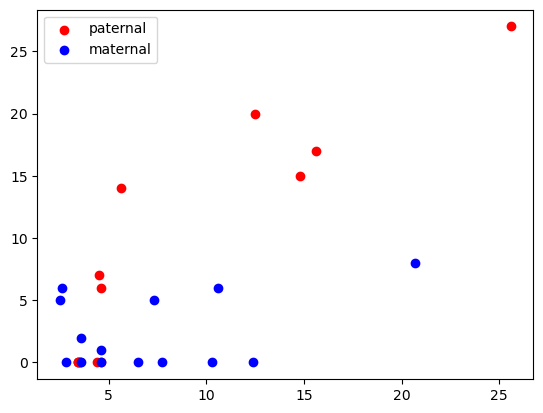

In [7]:
def load_macaque_wang_data():
    denovo_filename = "./data/denovo_tables/macaque_wang_denovo_table.txt"
    df = pd.read_csv(denovo_filename, skiprows=[0,1,2,3], sep="\t")
    offspring_ids = df["PROBAND"].unique()
    
    count_data = []
    id_list = []
    for oi in offspring_ids:
        id_list.append(oi)
        df_s = df[df["PROBAND"] == oi]
        unique_count = df_s["PHASE"].value_counts(dropna=False)
        maternal_count = 0 if "F" not in unique_count else unique_count["F"]
        paternal_count = 0 if "M" not in unique_count else unique_count["M"]
        row = {"sample_id": oi, "maternal_count": maternal_count, "paternal_count": paternal_count, "unphased_count": unique_count[np.nan], "total": len(df_s)}
        assert np.sum(unique_count) == len(df_s)
        count_data.append(row)
    df_count = pd.DataFrame(count_data)#, index=id_list)

    age_filename =  "./data/mutation_rate_individual_species/Rhesus_macaque_wang_2020.txt"
    col_header = ["sample_id", "maternal_age", "paternal_age", "mutation_count"]
    # skip the first row because no maternal and paternal age information
    df_age = pd.read_csv(age_filename, sep=" ", skiprows=1, header=None, names=col_header, usecols=[0,1,2,4])
    assert set(df_count["sample_id"]) == set(df_age["sample_id"])
    df_merge = pd.merge(df_age, df_count, on="sample_id")
    # the mutation count and computed mutation count doesn't match, probably caused by downstream filtering
    #  print(df_merge[["mutation_count","total"]])
    # assert np.all(df_merge["total"] == df_merge["mutation_count"])
    df_merge.to_csv("./output/phased_counts/macaque_wang_phased_counts.csv", index=False)
    plot_maternal_paternal_count(df_merge)
load_macaque_wang_data()

## Mouse data

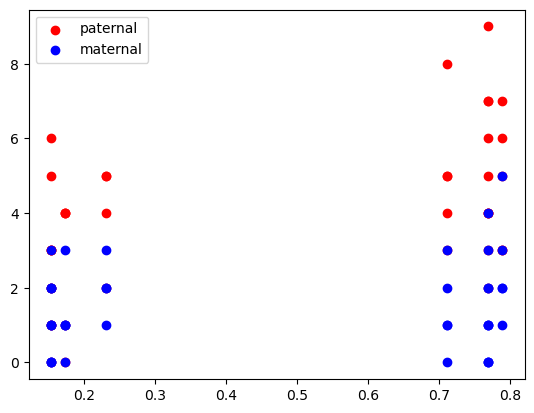

In [8]:
def get_mouse_phase_count_key(phase):
    if phase == "Maternal":
        count_key = "maternal_count"
    elif phase == "Paternal":
        count_key = "paternal_count"
    elif np.isnan(phase):
        count_key = "unphased_count"
    else:
        raise Exception("unidentified phase: {phase}")
    return count_key

def load_mouse_data():
    denovo_filename = "./data/denovo_tables/mouse_denovo_table.xlsx"
    df = pd.read_excel(denovo_filename) #, nrows=15)
    count_data = dict()
    for index, row in df.iterrows():
        indivs = [i for i in row["called in"].split(",") if i[-1] != "T"]
        phase = row["RP_Phasing"]
        count_key = get_mouse_phase_count_key(phase)
        for i in indivs:
            if i not in count_data:
                count_data[i] = {"sample_id": i, "maternal_count": 0, "paternal_count": 0, "unphased_count": 0, "total": 0}
            count_data[i][count_key] += 1
            count_data[i]["total"] += 1

    df_count = pd.DataFrame(list(count_data.values()))#, index=id_list)

    age_filename = "./data/mutation_rate_individual_species/lindsay_mouse_mutation_counts.txt"
    col_header = ["sample_id", "mutation_count", "age_week"]
    df_age = pd.read_csv(age_filename, sep=" ", header=None, names=col_header, usecols=[0, 5, 8])
    df_age["paternal_age"] = df_age["age_week"] / 52
    df_age["maternal_age"] = df_age["age_week"] / 52
    df_merge = pd.merge(df_age, df_count, on="sample_id")

    df_merge.to_csv("./output/phased_counts/mouse_phased_counts.csv", index=False)
    plot_maternal_paternal_count(df_merge)

load_mouse_data()
    

## Owl monkey

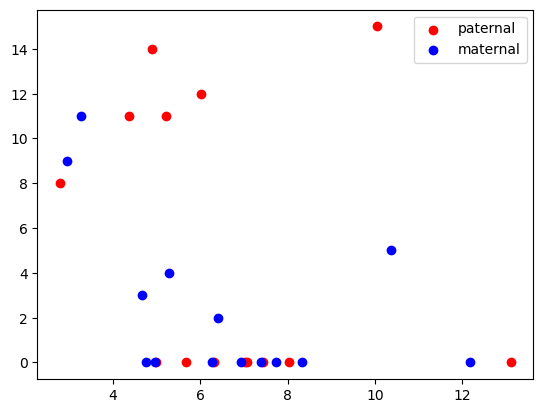

In [9]:
def load_owl_monkey_data():
    denovo_filename = "./data/mutation_rate_individual_species/Owl_monkey_thomas_2018.xlsx"
    df = pd.read_excel(denovo_filename, sheet_name="DataS1B-mutations", skiprows=[0,1]) #, nrows=15)
    offspring_ids = df["Trio"].unique()
    
    count_data = []
    id_list = []
    for oi in offspring_ids:
        id_list.append(oi)
        df_s = df[df["Trio"] == oi]
        unique_count = df_s["Phase"].value_counts(dropna=False)
        # print(unique_count)
        # break
        maternal_count = 0 if "F" not in unique_count else unique_count["F"]
        paternal_count = 0 if "M" not in unique_count else unique_count["M"]
        if np.nan not in unique_count:
            unphased_count = 0 if "IND" not in unique_count else unique_count["IND"]
        else:
            unphased_count = unique_count[np.nan]
        assert paternal_count + maternal_count + unphased_count == len(df_s)
        row = {"sample_id": oi, "maternal_count": maternal_count, "paternal_count": paternal_count, "unphased_count": unphased_count, "total": len(df_s)}
        assert np.sum(unique_count) == len(df_s)
        count_data.append(row)
    df_count = pd.DataFrame(count_data)#, index=id_list)

    age_filename = "./data/mutation_rate_individual_species/Owl_monkey_thomas_2018.xlsx"
    df_age = pd.read_excel(age_filename, sheet_name="DataS1C-rates", skiprows=[0,1], nrows=15)
    rename_map = {"Trio": "sample_id", "Paternal age": "paternal_age", "Maternal age": "maternal_age", "Mutations": "mutation_count"}
    df_age = df_age.rename(columns=rename_map)[["sample_id", "paternal_age", "maternal_age", "mutation_count"]]
    # # print(df_age.head())
    assert set(df_count["sample_id"]) == set(df_age["sample_id"])
    df_merge = pd.merge(df_age, df_count, on="sample_id")
    df_merge.to_csv("./output/phased_counts/owl_monkey_phased_counts.csv", index=False)
    plot_maternal_paternal_count(df_merge)
load_owl_monkey_data()